# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#Apellido, Nombre, DNI, email de todos los integrantes del grupo


Molinari Matias
Dni: 40756166
email: matiasmolinari_14@hotmail.com

#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


El data set que elegimos para este tp va a ser el de Precios del mercado central de argentina, que contiene informacion sobre los precios de los productos durante en difentes años.La problematica que planteamos radica en el modelo que nos gustaria que fuera  uno que pueda predecir con precisión el 'precio_usd_kg' en función del 'año', en endenter como estos precios han evolucionado a lo largo del tiempo y si es posible predecir futuras tendencias de precios.

El analisis de este conjunto puede ayudar en gran parte a los productores, comerciantes y consumidores al entender las tendencias de los precios asi pueden tomar decisiones mas firmes.


_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [9]:
#Subir archivo en la carpetita que aparece a la izquierda del colab, luego copiar la ruta y subirlo con las librerias necesarias
# Librerias de ayuda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#Data set.
df_mercadocentral = pd.read_csv('/content/precios-mercadocentral.csv')

##2- Aplicar PROCESO de EDA

In [10]:
df_mercadocentral.info

<bound method DataFrame.info of      pais_id       pais                          mercado   año     mes  \
0         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
1         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
2         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
3         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
4         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
..       ...        ...                              ...   ...     ...   
823       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
824       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
825       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
826       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
827       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   

      producto       variedad         origen  precio_usd_kg moneda_cod  \
0    

In [14]:
df_mercadocentral.head()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [13]:
df_mercadocentral.describe

<bound method NDFrame.describe of      pais_id       pais                          mercado   año     mes  \
0         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
1         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
2         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
3         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
4         32  Argentina  Mercado Central de Buenos Aires  2017   Enero   
..       ...        ...                              ...   ...     ...   
823       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
824       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
825       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
826       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   
827       32  Argentina  Mercado Central de Buenos Aires  2018  Agosto   

      producto       variedad         origen  precio_usd_kg moneda_cod  \
0  

In [15]:
#Vamos a mostrar las variables ordenadas de nuestro dataset
variables = df_mercadocentral.columns
variables_ordenadas = sorted(variables)
print(variables_ordenadas)

['año', 'mercado', 'mes', 'moneda', 'moneda_cod', 'origen', 'pais', 'pais_id', 'precio_usd_kg', 'producto', 'variedad']


In [18]:
df_mercadocentral.isnull().sum()

pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64

##3- Aplicar PROCESO DE LIMPIEZA

In [23]:
# vemos que solamente tenemos en la variable de precio_usd_kg un total de 61 valores nulos por lo tanto vamos a limpiar eso.
df_mercadocentral = df_mercadocentral.dropna(subset=['precio_usd_kg'])
#Reemplazamos los valores nulos con la media:
mean = df_mercadocentral['precio_usd_kg'].mean()
df_mercadocentral['precio_usd_kg'].fillna(mean, inplace=True)
#Mostramos el data set de nuevo
df_mercadocentral

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares


In [24]:
#Corroboramos que la limpieza esta bien hecha
df_mercadocentral.isnull().sum()

pais_id          0
pais             0
mercado          0
año              0
mes              0
producto         0
variedad         0
origen           0
precio_usd_kg    0
moneda_cod       0
moneda           0
dtype: int64

##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Queremos predecir  el precio en usd en funcion del año
# Definir X e Y
X = df_mercadocentral[['año']]
Y = df_mercadocentral['precio_usd_kg']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Predecir los valores de 'precio_usd_kg' para el conjunto de prueba
Y_pred = model.predict(X_test)


In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

In [33]:
#El MSE es una métrica común para evaluar modelos de regresión lineal. Cuanto más pequeño sea el MSE, mejor será el modelo.

from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, Y_pred)

print('Error cuadrático medio: ', mse)

Error cuadrático medio:  1.9930277760621065


In [34]:
#El MAE calcula el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es una métrica fácil de entender porque simplemente mide el error promedio

from sklearn.metrics import mean_absolute_error, r2_score

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print('Error absoluto medio: ', mae)

#Esta métrica proporciona una medida de cuánto de la variabilidad total en Y es explicada por el modelo

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(Y_test, Y_pred)
print('Coeficiente de determinación: ', r2)


Error absoluto medio:  0.8031186305960928
Coeficiente de determinación:  -0.010411992943752502


##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

Lo iba aclarar en el punto 5 pero tal vez se hacia muy repetitivo al pasarlo en este punto.

Recordemos lo siguiente:

El mse Cuanto más pequeño sea el MSE, mejor será el modelo.

El MAE es una métrica fácil de entender porque simplemente mide el error promedio.

El R^2 cercano a 1 indica que el modelo puede explicar la mayoría de la variabilidad en los datos observados, mientras que un R^2 cercano a 0 indica que el modelo no explica mucho de la variabilidad en los datos.



Entonces nosotros obtuvimos los siguientes valores:
 (MSE) Error cuadrático medio:  1.993027776062106, lo cual indica que el modelo tiene un error de aprox 1.993 al predecir el precio_usd_kg, nuestras predicciones se desvian esa cantidad del valor real.

 (MAE) quedo con un error absoluto medio de 0.803 aprox que es lo que se desvia del valor real sin tener en cuenta la direccion de la variacion.

 El R^2 es de -0.0104 esta mas cerca del 0 por lo tanto el modelo no explica mucho de la variabilidad de los datos.

 En resumen podemos decir que nuestro modelo  de regresion lineal no se ajusta muy bien a los datos y no proporciona buenas predicciones para las variables obtenidas.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


In [36]:
from sklearn.cluster import KMeans

# Definir el número de clusters
n_clusters = 3

# Crear un modelo k-means
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos
kmeans.fit(df_mercadocentral[['precio_usd_kg']])

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame como una nueva columna
df_mercadocentral['cluster'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


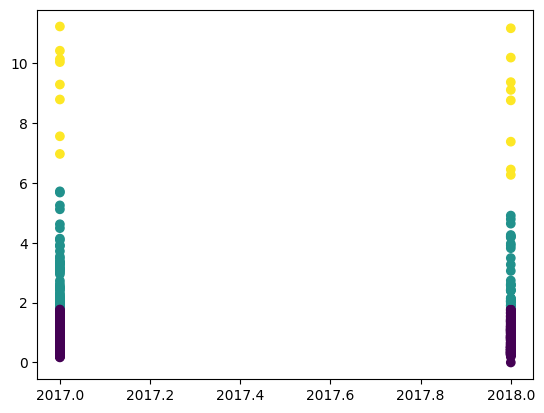

In [37]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un scatter plot con los datos de 'precio_usd_kg' y los colores basados en las etiquetas de los clusters
scatter = ax.scatter(df_mercadocentral['año'], df_mercadocentral['precio_usd_kg'], c=df_mercadocentral['cluster'])

# Mostrar el gráfico
plt.show()


In [41]:
from sklearn.cluster import DBSCAN

# Crear un modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo a los datos
dbscan.fit(df_mercadocentral[['precio_usd_kg']])

# Obtener las etiquetas de los clusters
labels = dbscan.labels_

# Agregar las etiquetas al DataFrame como una nueva columna
df_mercadocentral['cluster'] = labels


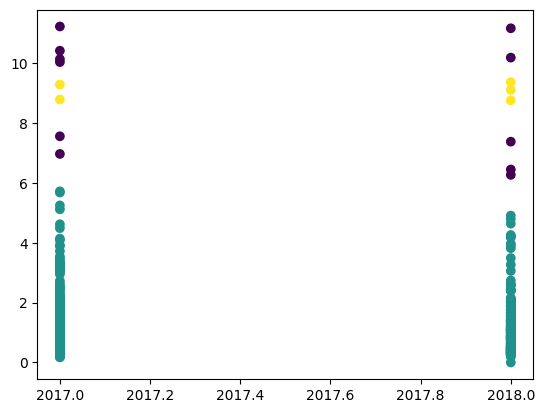

In [42]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un scatter plot con los datos de 'precio_usd_kg' y los colores basados en las etiquetas de los clusters
scatter = ax.scatter(df_mercadocentral['año'], df_mercadocentral['precio_usd_kg'], c=df_mercadocentral['cluster'])

# Mostrar el gráfico
plt.show()


Una breve aclaracion de los modelos utilizados:

KMeans: Es un algoritmo de agrupamiento basado en centroides. Parte de un número inicial de clusters y asigna cada punto al cluster más cercano. Luego recalcula los centroides y repite el proceso hasta que los clusters ya no cambian.

DBSCAN es un algoritmo de agrupamiento basado en densidad. No necesita un número inicial de clusters. En su lugar, agrupa puntos que están cerca entre sí en el espacio de características y que tienen un número mínimo de vecinos.


En términos de visualización, ambos pueden producir gráficos similares si los datos se agrupan de manera similar. Sin embargo, DBSCAN tiene la ventaja adicional de poder encontrar clusters de formas arbitrarias, mientras que k-means tiende a encontrar clusters esféricos.


##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

Basándonos en el punto 7, podemos hacer las siguientes observaciones:

- Los datos se agrupan en tres clusters distintos basados en el 'precio_usd_kg'. Esto podría indicar que existen ciertos rangos de precios que son más comunes en tus datos.

- Sin embargo, todos los clusters se extienden a lo largo del mismo rango de años. Esto podría indicar que el 'año' no tiene un impacto significativo en la formación de estos clusters.

- Para mejorar la predicción, podrías considerar incluir más variables en el modelo o usar otras para volver a hacer todo el proceso.

Ahora observemos los dos graficos que hicimos donde vemos el espacio que falta entre los meses que abarcan del año 2017 al año 2018.Esto podria deberse a lo siguiente:

- **Falta de datos**: Es posible que no se hayan recopilado o registrado datos durante ese período.

- **Filtrado de datos**: Si se realizó algún tipo de filtrado o limpieza en los datos, es posible que se hayan eliminado los datos de ese período.

- **Error en la recopilación de datos**: A veces, los errores en la recopilación o el almacenamiento de datos pueden llevar a que falten datos.

Para concluir nuestro modelo de regresión lineal no proporcionó predicciones precisas, el análisis exploratorio y el agrupamiento nos dieron algunas ideas sobre la estructura y las tendencias en los datos. Para futuros análisis, podríamos considerar incluir más variables en nuestro modelo o probar diferentes técnicas de modelado.